# Speech Recognition with Delta-Delta's 
This model will convert recorded speech data into Mel-Spectrogram and then to Delta and finally the Delta-Delta's. 


In [635]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import librosa 
import librosa.display 
import IPython.display as ipd


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Organizing Data 
loading in a CSV that was created in EDA https://github.com/Jyve00/Emotion_Dectection/blob/main/EDA.ipynb

In [636]:
# using Pandas to load in csv for metadata on RAVDESS 
df = pd.read_csv('/Users/stephen/Emotion_Dectection/data/RAVDESS/metadata.csv', index_col=0)
df.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,actor_sex
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-08-02-02-01-01.wav,audio_only,speech,surprised,strong,Dogs are sitting by the door,first_repitition,1,male
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-08-01-01-01-01.wav,audio_only,speech,surprised,normal,Kids are talking by the door,first_repitition,1,male
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-05-01-02-01-01.wav,audio_only,speech,angry,normal,Dogs are sitting by the door,first_repitition,1,male
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-06-01-02-02-01.wav,audio_only,speech,fearful,normal,Dogs are sitting by the door,second_repetition,1,male
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-06-02-01-02-01.wav,audio_only,speech,fearful,strong,Kids are talking by the door,second_repetition,1,male


In [637]:
# for this model we only need the 'emotion' column which contains out labels/ target which there are 8 of. We'll also sort by classes 
df.drop(columns=['modality', 'vocal_channel', 'emotional_intensity', 'statement', 'repetition', 'actor', 'actor_sex'], inplace=True)
df.sort_values(by='emotion')

,emotion
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_20/03-01-05-01-02-02-20.wav,angry
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_03/03-01-05-02-01-01-03.wav,angry
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_03/03-01-05-01-02-01-03.wav,angry
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_14/03-01-05-01-01-02-14.wav,angry
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_14/03-01-05-02-02-02-14.wav,angry
...,...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_13/03-01-08-02-02-01-13.wav,surprised
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_13/03-01-08-01-01-01-13.wav,surprised
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_06/03-01-08-02-01-02-06.wav,surprised
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_21/03-01-08-01-02-02-21.wav,surprised


In [638]:
df['Path'] = df.index
df

,emotion,Path
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-08-02-02-01-01.wav,surprised,/Users/stephen/Emotion_Dectection/data/RAVDESS...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-08-01-01-01-01.wav,surprised,/Users/stephen/Emotion_Dectection/data/RAVDESS...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-05-01-02-01-01.wav,angry,/Users/stephen/Emotion_Dectection/data/RAVDESS...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-06-01-02-02-01.wav,fearful,/Users/stephen/Emotion_Dectection/data/RAVDESS...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-06-02-01-02-01.wav,fearful,/Users/stephen/Emotion_Dectection/data/RAVDESS...
...,...,...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_23/03-01-03-02-02-02-23.wav,happy,/Users/stephen/Emotion_Dectection/data/RAVDESS...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_23/03-01-03-01-01-02-23.wav,happy,/Users/stephen/Emotion_Dectection/data/RAVDESS...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_23/03-01-02-02-01-01-23.wav,calm,/Users/stephen/Emotion_Dectection/data/RAVDESS...
/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_23/03-01-02-01-02-01-23.wav,calm,/Users/stephen/Emotion_Dectection/data/RAVDESS...


In [639]:
df = df[['emotion', 'Path']]
df.reset_index(level=0, inplace=True)

df

,index,emotion,Path
0,/Users/stephen/Emotion_Dectection/data/RAVDESS...,surprised,/Users/stephen/Emotion_Dectection/data/RAVDESS...
1,/Users/stephen/Emotion_Dectection/data/RAVDESS...,surprised,/Users/stephen/Emotion_Dectection/data/RAVDESS...
2,/Users/stephen/Emotion_Dectection/data/RAVDESS...,angry,/Users/stephen/Emotion_Dectection/data/RAVDESS...
3,/Users/stephen/Emotion_Dectection/data/RAVDESS...,fearful,/Users/stephen/Emotion_Dectection/data/RAVDESS...
4,/Users/stephen/Emotion_Dectection/data/RAVDESS...,fearful,/Users/stephen/Emotion_Dectection/data/RAVDESS...
...,...,...,...
1375,/Users/stephen/Emotion_Dectection/data/RAVDESS...,happy,/Users/stephen/Emotion_Dectection/data/RAVDESS...
1376,/Users/stephen/Emotion_Dectection/data/RAVDESS...,happy,/Users/stephen/Emotion_Dectection/data/RAVDESS...
1377,/Users/stephen/Emotion_Dectection/data/RAVDESS...,calm,/Users/stephen/Emotion_Dectection/data/RAVDESS...
1378,/Users/stephen/Emotion_Dectection/data/RAVDESS...,calm,/Users/stephen/Emotion_Dectection/data/RAVDESS...


# Data Augmentation Functions 
It is common practice to transform audio data with data augmentation tools like time adding white noise, time-stretching and pitch shifts. 
We'll make duplicates of each wav file so our model will have more variable input data. 

.wav file shape: (61929,)
sample rate: 16000


Text(0.5, 1.0, 'Strong Anger')

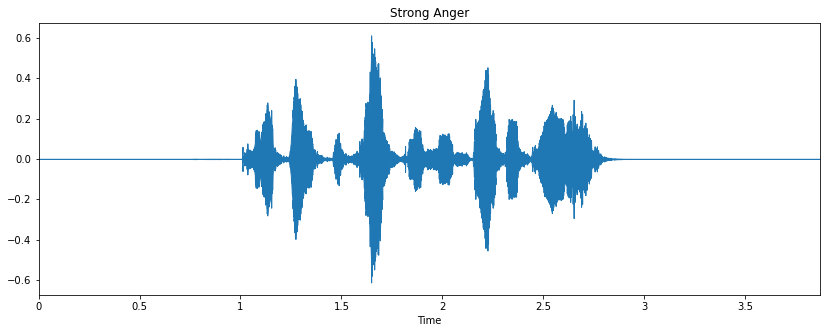

In [640]:
# test ideas and visualize 

# randomly choosen file                                                                     
# Emotion is 'Anger' and Intensity is strong 
test_wav_path = '/Users/stephen/Emotion_Dectection/data/RAVDESS/Audio_Speech_Actors_01-24/Actor_04/03-01-05-02-01-02-04.wav'
sig, sr = librosa.load(test_wav_path, sr=16000) # 
print('.wav file shape: ' + str(sig.shape))
print('sample rate: ' + str(sr))
plt.figure(figsize=(14, 5))
librosa.display.waveplot(sig, sr=sr)
plt.title('Strong Anger')
#ipd.Audio(test_signal, sr)


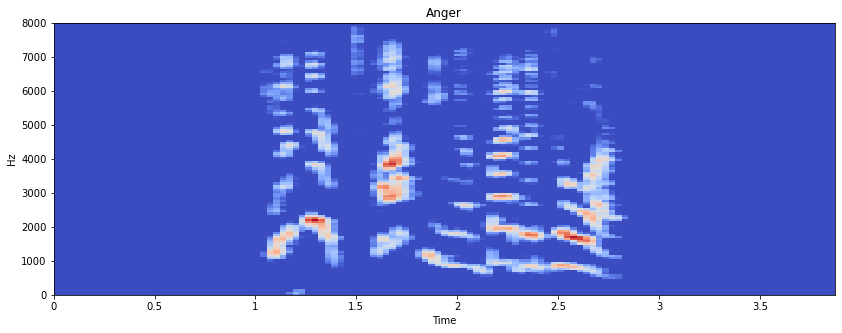

In [641]:
# mellllllsss
mel = librosa.feature.melspectrogram(sig)
mel_db = librosa.amplitude_to_db(mel)
plt.figure(figsize=(14, 5))
plt.title('Anger')
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='hz')


# Feature Extraction 
one of the best ASR (automatic Speech Recognition) audio feature extract methods is using a combination of MFCC's, the delta of those MFCC's, and the delta of those deltas (AKA Delta-Deltas). Here we will create functions to 

deltas - trajectories of the MFCC coefficients over time


http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

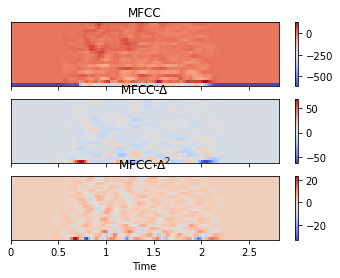

In [642]:
# Showing actual feature extractions used 
# resource: https://librosa.org/doc/main/generated/librosa.feature.delta.html?highlight=delta#librosa.feature.delta

test_mfcc = librosa.feature.mfcc(y=sig, sr=sr)
test_mfcc_delta = librosa.feature.delta(test_mfcc)
test_mfcc_delta2 = librosa.feature.delta(test_mfcc, order=2)




fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
img1 = librosa.display.specshow(test_mfcc, ax=ax[0], x_axis='time')
ax[0].set(title='MFCC')
ax[0].label_outer()
img2 = librosa.display.specshow(test_mfcc_delta, ax=ax[1], x_axis='time')
ax[1].set(title=r'MFCC-$\Delta$')
ax[1].label_outer()
img3 = librosa.display.specshow(test_mfcc_delta2, ax=ax[2], x_axis='time')
ax[2].set(title=r'MFCC-$\Delta^2$')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])
fig.colorbar(img3, ax=[ax[2]])

# Data Augmentation Functions 
It is common practice to transform audio data with data augmentation tools like time adding white noise, time-stretching and pitch shifts. 
We'll make duplicates of each wav file so our model will have more variable input data. 

In [643]:
# adding Additive White Gausian Noise
def noise(data, SNR=10):   # https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8
    #noise_amp = 0.035*np.random.uniform()*np.amax(data)
    #data = data + noise_amp*np.random.normal(size=data.shape[0])
    #return data
    # RMS value of signal 
    RMS_s = math.sqrt(np.mean(data**2))
    # RMS values of noise 
    RMS_n = math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    # using population formula for standard daviation 
    # mean = 0 STD = RMS
    STD_n = RMS_n 
    noise = np.random.normal(0, STD_n, data.shape[0])
    new_data = data + noise
    return np.mean(librosa.feature.mfcc(y=new_data, sr=16000, n_mfcc=13).T, axis=0)

# Time Strectching 
def stretch(data, rate=0.75):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

# Pre Emphasis     info on Pre-Emphasis in speech recognition: https://wiki.aalto.fi/display/ITSP/Pre-emphasis
def pre_emphasize(data):
    return librosa.effects.preemphasis(data, coef=1)

def pitch(data, sampling_rate):
    return librosa.effects.pitch_shift(data, sampling_rate, n_steps=3, bins_per_octave=24)
# taking any example and checking for techniques.
path = np.array(df.Path)[1]
data, sample_rate = librosa.load(path)

In [659]:
# https://librosa.org/doc/main/generated/librosa.feature.delta.html

def extract_features(data):
    sample_rate = 16000

    result = np.array([])



    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    
    # MFCC Delta
    mfcc_delta = np.mean(librosa.feature.delta(data=mfcc).T, axis=0)
    result = np.hstack((result, mfcc_delta)) # stacking horizontally

    # MFCC Delta-Delta
    mfcc_delta2 = np.mean(librosa.feature.delta(data=mfcc, order=2).T, axis=0)
    result = np.hstack((result, mfcc_delta2)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally
    
    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path): 
    # duration and offset are used to take care of the no audio in start and the ending of each audio files .
    data, sample_rate = librosa.load(path, sr=16000, duration=2.5, offset=0.6)  # , 
    #data, index = librosa.effects.trim(_data)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    #new_data = stretch(data)
    #data_stretch_pitch = pitch(new_data, sample_rate)
    #res3 = extract_features(data_stretch_pitch)
    #result = np.vstack((result, res3)) # stacking vertically

    pre_emp_data = pre_emphasize(data)
    res4 = extract_features(pre_emp_data)
    result = np.vstack((result, res4)) # stacking vertically
    
    return result


# Calling Functions and preparing data for CNN
So the outline of our features are: 
    - 

In [660]:
X, Y = [], []
for path, emotion in zip(df.Path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)


/Users/stephen/opt/anaconda3/envs/torch_env/lib/python3.9/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=12
  warnings.warn(


In [662]:
len(X), len(Y), df.Path.shape

(4140, 4140, (1380,))

In [663]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,labels
0,-503.185974,57.042301,-8.313340,13.147138,-7.274663,-6.099257,-16.450794,-20.211823,-11.638207,0.479528,...,0.000839,5.788149e-04,0.000471,0.000436,0.000508,4.320344e-04,0.000399,0.000087,9.128546e-06,surprised
1,29.912209,-99.705097,27.487908,-15.716419,-0.736366,-22.383708,-1.618126,10.088343,43.293486,54.078932,...,645433.349228,1.312445e+06,0.051437,0.000283,17.295957,1.729966e+06,83281.804426,0.000080,1.221729e+04,surprised
2,-582.685486,-13.861852,-24.370552,-1.403817,-17.714478,-13.501724,-22.958916,-24.587143,-15.874348,-2.136194,...,0.003045,2.144882e-03,0.001774,0.001669,0.001966,1.693892e-03,0.001574,0.000344,3.638589e-05,surprised
3,-592.649109,67.523392,-4.463047,15.199685,-1.826691,-6.050766,-12.518244,-12.480824,-13.755399,1.120708,...,0.000009,6.031017e-06,0.000007,0.000010,0.000008,6.372401e-06,0.000006,0.000002,4.764982e-08,surprised
4,57.403811,-98.073084,26.251412,-16.099310,-0.569975,-21.891479,-2.223549,9.460541,43.312953,54.585534,...,995473.352637,2.024227e+06,0.079325,0.000433,26.398546,2.640420e+06,127111.687433,0.000121,1.788293e+04,surprised


In [664]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [665]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [666]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3105, 151), (3105, 8), (1035, 151), (1035, 8))

In [667]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3105, 151), (3105, 8), (1035, 151), (1035, 8))

In [668]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3105, 151, 1), (3105, 8), (1035, 151, 1), (1035, 8))

In [669]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_60 (Conv1D)          (None, 151, 256)          1536      
                                                                 
 max_pooling1d_60 (MaxPoolin  (None, 76, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_61 (Conv1D)          (None, 76, 256)           327936    
                                                                 
 max_pooling1d_61 (MaxPoolin  (None, 38, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_62 (Conv1D)          (None, 38, 128)           163968    
                                                                 
 max_pooling1d_62 (MaxPoolin  (None, 19, 128)        

In [670]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
49/49 [==============================] - 5s 92ms/step - loss: 2.0551 - accuracy: 0.1588 - val_loss: 2.0307 - val_accuracy: 0.1816 - lr: 0.0010
Epoch 2/50
49/49 [==============================] - 5s 95ms/step - loss: 2.0050 - accuracy: 0.1749 - val_loss: 2.0058 - val_accuracy: 0.2106 - lr: 0.0010
Epoch 3/50
49/49 [==============================] - 5s 97ms/step - loss: 1.9732 - accuracy: 0.2100 - val_loss: 1.9531 - val_accuracy: 0.2164 - lr: 0.0010
Epoch 4/50
49/49 [==============================] - 5s 93ms/step - loss: 1.9173 - accuracy: 0.2377 - val_loss: 1.9121 - val_accuracy: 0.2589 - lr: 0.0010
Epoch 5/50
49/49 [==============================] - 5s 95ms/step - loss: 1.8730 - accuracy: 0.2541 - val_loss: 1.8569 - val_accuracy: 0.2638 - lr: 0.0010
Epoch 6/50
49/49 [==============================] - 5s 98ms/step - loss: 1.8482 - accuracy: 0.2557 - val_loss: 1.8436 - val_accuracy: 0.2560 - lr: 0.0010
Epoch 7/50
49/49 [==============================] - 5s 95ms/step - loss: 1.8

In [678]:
y_test.shape

(1035, 1)

33/33 [==============================] - 0s 11ms/step - loss: 1.7713 - accuracy: 0.2908
Accuracy of our model on test data :  29.082125425338745 %


ValueError: x and y must have same first dimension, but have shapes (50,) and (10,)

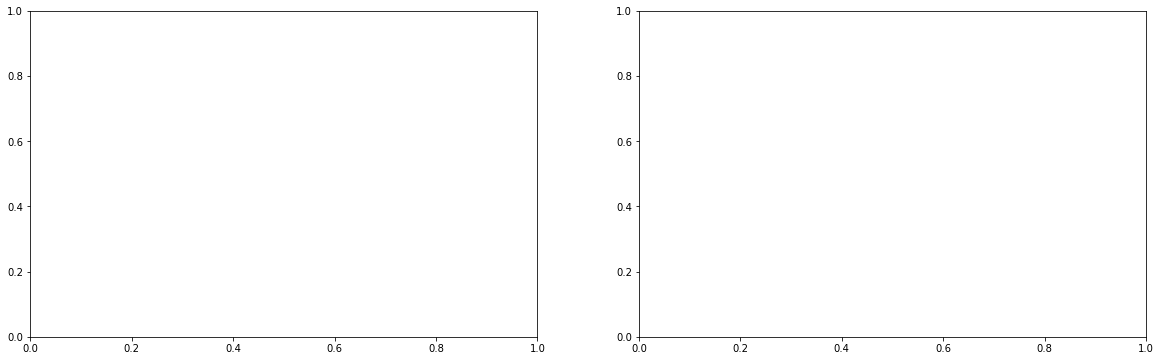

In [655]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [671]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [672]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,calm,sad
1,calm,calm
2,happy,happy
3,surprised,surprised
4,disgust,disgust
5,surprised,neutral
6,surprised,calm
7,happy,angry
8,calm,calm
9,calm,calm


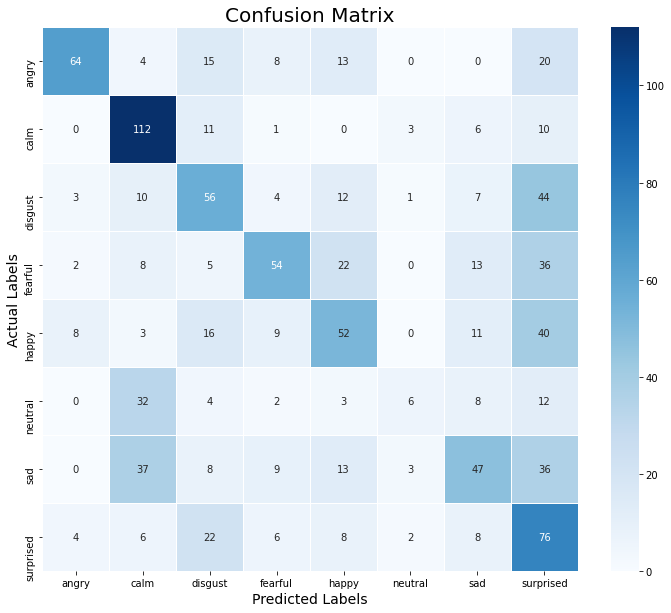

In [673]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [674]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.79      0.52      0.62       124
        calm       0.53      0.78      0.63       143
     disgust       0.41      0.41      0.41       137
     fearful       0.58      0.39      0.46       140
       happy       0.42      0.37      0.40       139
     neutral       0.40      0.09      0.15        67
         sad       0.47      0.31      0.37       153
   surprised       0.28      0.58      0.37       132

    accuracy                           0.45      1035
   macro avg       0.48      0.43      0.43      1035
weighted avg       0.49      0.45      0.44      1035



Biggest Challenge: Dealing with combining features and reshaping dimensions to fit CNN. Although overfitting has been solved with data augmentation. One challenge is dealing with feature extraction which now takes up sometime because of vertically stacking feature outputs into arrays. 


Today: worked on new feature extractions and applied audio data augmentation which has significantly improved overfitting although runtime has also increased signaifiantlly. MVP model is finished and markdown is almost complete. Readme has begun. 

Next: may attempt at adding the singing portion of the dataset since its already there and in the same format as the speech dataset. 

Issues: runtime has significantly increased but the trade off is a less overfit model. 